# Image Recognition with Convolutional Neural Networks

This exercise challenges you to build an image recognition model using a convolutional neural network. You'll select an image dataset, then train a model for image classification, object detection, or image segmentation using convolutional neural networks.

**Tasks:**

1. **Dataset Selection:** Choose a dataset. Consider dataset size, complexity, and availability. Only public datasets are acceptable. Briefly describe your dataset.
2. **Data Preparation:** Prepare the data: resize images, augment data, and split into training, validation, and test sets.
3. **Model Selection:** Choose a neural network architecture. Justify your choice based on the dataset and task.
4. **Training:** Train your model on the training data, monitoring performance on the validation set.
5. **Evaluation:** Evaluate the model's performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, mAP, IoU).
6. **Results and Discussion:** Present results, analyze performance, and discuss limitations or areas for improvement.

**Dataset Examples:**

* **Classification:** CIFAR-10/100, MNIST
* **Object Detection:** Pascal VOC/COCO
* **Segmentation:** Cityscapes

**Deliverables:**

* Jupyter Notebook with code for data preparation, model training, and evaluation. The outputs of the different code cells should be visible. At the end of the notebook add a brief report summarizing your approach, results, and discussion.

## 1. Dataset description, download and exploration

In [43]:
! pip install -q torch torchvision torchsummary
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [44]:
test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

valid_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [5000, 5000])

valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [47]:
images, labels = next(iter(test_loader))
plt.rcParams['figure.figsize'] = (10,10)
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

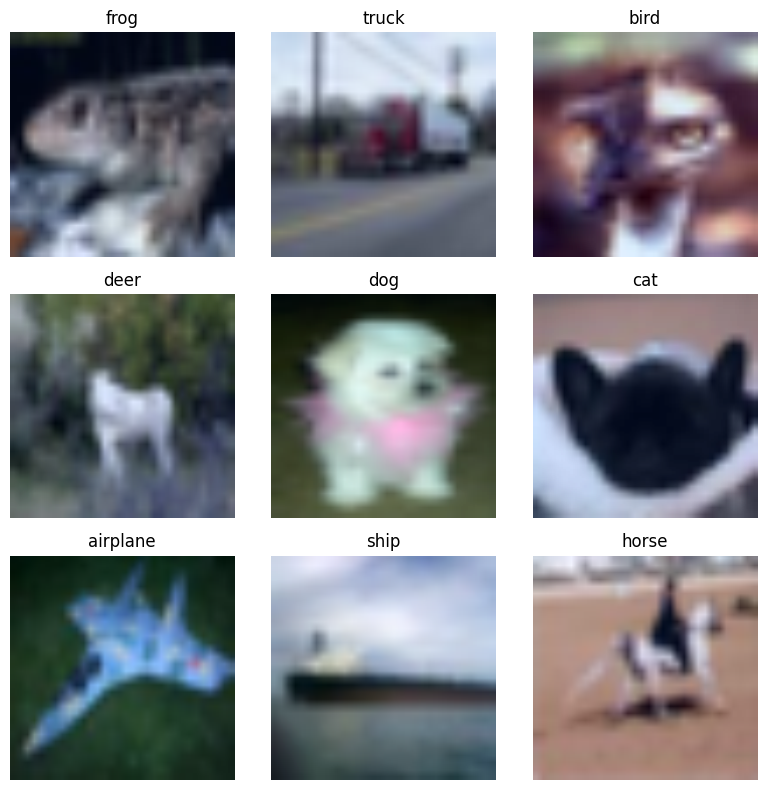

In [ ]:
# Plot one image per class in a 3x3 grid
shown_classes = set()
nrows, ncols = 3, 3
plotted = 0

plt.figure(figsize=(8, 8))
for idx in range(len(labels)):
    cls = labels[idx].item()
    if cls not in shown_classes:
        shown_classes.add(cls)
        img = images[idx].numpy().transpose((1, 2, 0))
        img = (img - img.min()) / (img.max() - img.min())
        plt.subplot(nrows, ncols, plotted + 1)
        plt.imshow(img)
        plt.title(class_to_string(cls))
        plt.axis('off')
        plotted += 1
        if plotted == nrows * ncols:
            break
plt.tight_layout()
plt.show()

### Dataset description
size = 10000

lables:

-0=airplane

-1=automobile

-2=bird

-3=cat

-4=deer

-5=dog

-6=frog

-7=horse

-8=ship

-9=truck


## 2. Data preparation and augmentation

In [54]:
# We do the same transformations except for the ones that augment the data
train_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),# Randomly flip the image horizontally
    transforms.RandomRotation(degrees=15),# Randomly rotate the image by up to 15 degrees
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


## 3. Model selection

In [ ]:
model = models.resnet18(pretrained=True)
# Load a pre-trained ResNet18 model: a type of convolutional neural network architecture known for its performance on image classification tasks.
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

c:\Users\veint\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\veint\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\veint/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 26.6MB/s]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Search for a GPU, if available, otherwise use the CPU.
model.to(device);

In [58]:
summary(model, (3, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           9,408
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
         MaxPool2d-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
             ReLU-10         [-1, 64, 128, 128]               0
       BasicBlock-11         [-1, 64, 128, 128]               0
           Conv2d-12         [-1, 64, 128, 128]          36,864
      BatchNorm2d-13         [-1, 64, 128, 128]             128
             ReLU-14         [-1, 64, 1

In [59]:
criterion = nn.CrossEntropyLoss()
# CrossEntropyLoss is a loss function commonly used for multi-class classification tasks.
optimizer = optim.RMSprop(model.parameters(), lr=2e-5)
# RMSprop is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on the average of recent gradients.

## 4. Training

In [60]:
def get_accuracy(y_pred, y_true):
    _, y_pred = torch.max(y_pred, dim=1)
    correct = torch.sum(y_pred == y_true).float()
    acc = correct / len(y_true)
    return acc

In [61]:
train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []

num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Clear gradients
        optimizer.zero_grad()

        # Move images and labels to device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Calculate accuracy
    train_loss = 0
    valid_loss = 0
    train_accuracy = 0
    valid_accuracy = 0

    # Turn off gradients for validation to speed up inference
    with torch.no_grad():
        for images, labels in train_loader:

            # Move images and labels to device
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            output = model(images)

            # Calculate loss
            train_loss += criterion(output, labels)

            # Calculate accuracy
            train_accuracy += get_accuracy(output, labels)

        train_loss_history.append(train_loss.cpu().numpy() / len(train_loader))
        train_accuracy_history.append(train_accuracy.cpu().numpy() / len(train_loader))

        for images, labels in valid_loader:

            # Move images and labels to device
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            output = model(images)

            # Calculate loss
            valid_loss += criterion(output, labels)

            # Calculate accuracy
            valid_accuracy += get_accuracy(output, labels)

        valid_loss_history.append(valid_loss.cpu().numpy() / len(valid_loader))
        valid_accuracy_history.append(valid_accuracy.cpu().numpy() / len(valid_loader))

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train loss: {train_loss/len(train_loader):.3f} | "
              f"Train accuracy: {train_accuracy/len(train_loader):.3f} | "
              f"Valid loss: {valid_loss/len(valid_loader):.3f} | "
              f"Valid accuracy: {valid_accuracy/len(valid_loader):.3f}")

KeyboardInterrupt: 

## 5. Evaluation on the test set

## 6. Results and discussion